In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

C:\Users\123\AppData\Local\Temp\ipykernel_8336\3299100696.py:60: RuntimeWarning: invalid value encountered in divide
  xb /= np.linalg.norm(xb)
C:\Users\123\AppData\Local\Temp\ipykernel_8336\3299100696.py:64: RuntimeWarning: invalid value encountered in divide
  yb /= np.linalg.norm(yb)


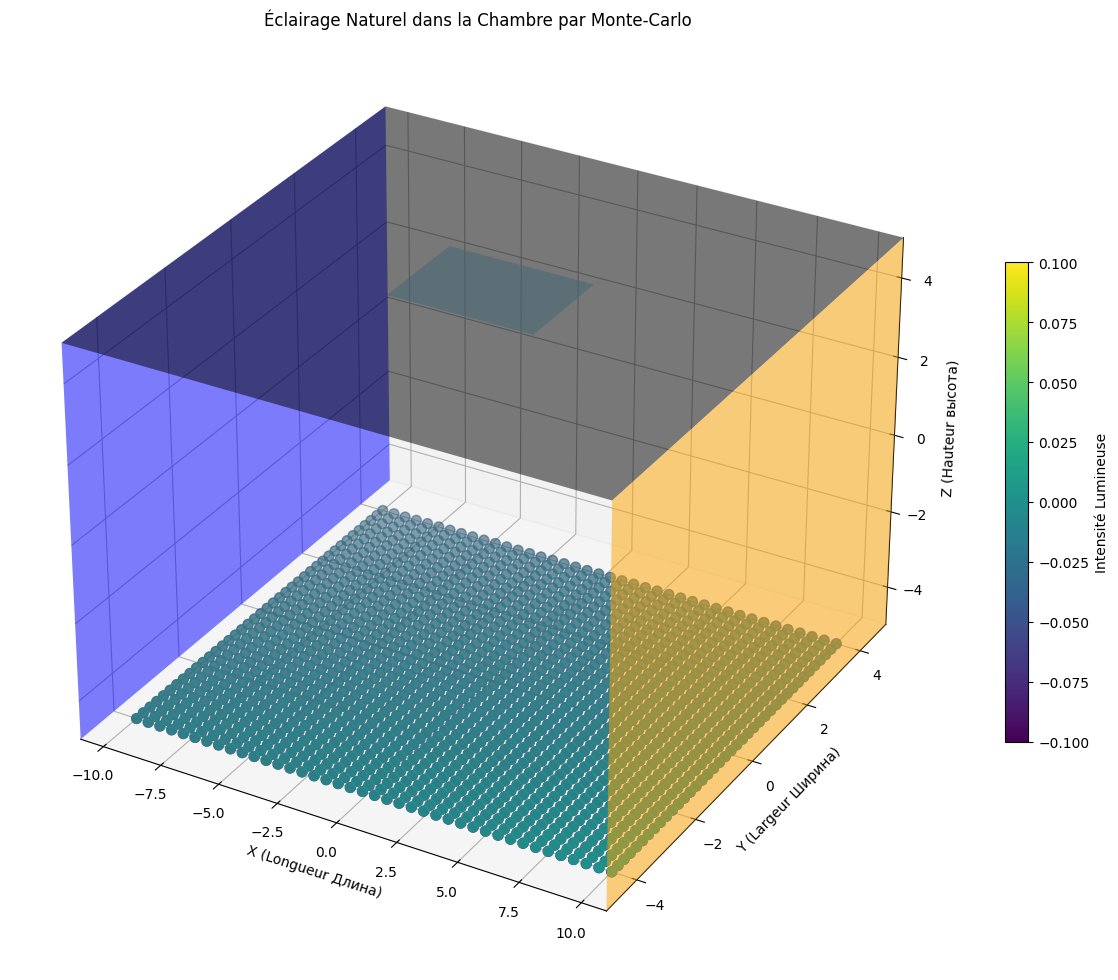

In [15]:
# Dimensions de la chambre
longueur = 11  # axe X Длина
largeur = 5    # axe Y Ширина
hauteur = 5    # axe Z высота

# Création de la figure 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')



# Définition des vertices pour chaque surface
def create_wall(vertices, color='lightgrey'):
   ax.add_collection3d(Poly3DCollection([vertices], alpha=0.5, facecolors=color))
    #ax.plot_surface(Poly3DCollection([vertices], alpha=0.5, facecolors=color))

# Sol (Z = -5)
#create_wall([[-longueur, -largeur, -hauteur], [longueur, -largeur, -hauteur], 
#             [longueur, largeur, -hauteur], [-longueur, largeur, -hauteur]], 'blue')

# Plafond (Z = 5) avec fenêtre potalok
plafond = [[-longueur, -largeur, hauteur], [longueur, -largeur, hauteur],
           [longueur, largeur, hauteur], [-longueur, largeur, hauteur]]
create_wall(plafond, 'black')

# Fenêtre (partie du plafond)
fenetre = [[-3, -1, hauteur-0.01], [3, -1, hauteur-0.01],  # Léger décalage en Z
           [3, 1, hauteur-0.01], [-3, 1, hauteur-0.01]]
create_wall(fenetre, 'skyblue')  # Couleur bleue pour la fenêtre

# Murs
create_wall([[-longueur, -largeur, -hauteur], [-longueur, -largeur, hauteur],
             [-longueur, largeur, hauteur], [-longueur, largeur, -hauteur]], 'blue')  # Mur gauche

# Mur droit
create_wall([[longueur, largeur, hauteur], [longueur, largeur, -hauteur],
             [longueur, -largeur, -hauteur], [longueur, -largeur, hauteur]], 'orange')
# Mur arriere 
#create_wall([[-longueur, largeur, -hauteur], [-longueur, largeur, hauteur],
##             [longueur, largeur, hauteur], [longueur, largeur, -hauteur]], 'lightgrey')

# Mur devant 
#create_wall([[-longueur, -largeur, -hauteur], [-longueur, -largeur, hauteur],
#             [longueur, -largeur, hauteur], [longueur, -largeur, -hauteur]], 'blue')

# La fonctino pour faire monte carlo
num_param = 1000
def monte_carlo_lighting(surface_points, num_rays=num_param):
    intensities = []
    for point in surface_points:
        hits = 0
        # les formule je viens d'ajouter mena, j'ai ajouter avant la boucle for
        n = np.array([0.0, 0.0, 1.0])
        
        ref = np.array([0.0, 0.0, 1.0])
        
        # les valeurs de xb que je viens d'ajouter
        # np.cross(a, b) = 
        xb = np.cross(n, ref)
        xb /= np.linalg.norm(xb)

        # les coordonner de yb
        yb = np.cross(n, ref)
        yb /= np.linalg.norm(yb)


        for _ in range(num_rays):
            # Génération aléatoire d'une direction vers le haut (hémisphère)
            theta = np.arccos(np.random.uniform(0, 1))  # Entre 0 et π/2
            phi = np.random.uniform(0, 2*np.pi)
           # n = np.random.uniform(0, 2)
            dx = np.sin(theta) * np.cos(phi)
            dy = np.sin(theta) * np.sin(phi)
            dz = np.cos(theta)
            
            # Vérification d'intersection avec la fenêtre


            dglobal = dx*xb+ dy*yb + dz*n
        
            if np.abs(dglobal[2]) < 1e-6:
                continue 

            t = (hauteur - point[2]) / dglobal[2]
            if t > 0:  # Le rayon va vers le haut радиус идет вверх
                x_intersect = point[0] + dglobal[0] * t
                y_intersect = point[1] + dglobal[1] * t
                # Vérification si dans la fenêtre
                if (-3 <= x_intersect <= 3) and (-1 <= y_intersect <= 1):
                    hits += 1
        intensities.append(hits / num_rays)
    return intensities

# Exemple pour le sol
x = np.linspace(-longueur+1, longueur-1, 40)  # Éviter les bords
y = np.linspace(-largeur+1, largeur-1, 40)
X, Y = np.meshgrid(x, y)
# x.ravel racploucite
points_sol = np.vstack([X.ravel(), Y.ravel(), -hauteur*np.ones_like(X.ravel())]).T


intensity_sol = monte_carlo_lighting(points_sol)

# 
sc_sol = ax.scatter(points_sol[:,0], points_sol[:,1], points_sol[:,2], 
                  c=intensity_sol, cmap='viridis', s=50)
# Affichage des intensités sur le sol
# Отображение интенсивности на местности
sc_sol = ax.scatter(points_sol[:,0], points_sol[:,1], points_sol[:,2], 
                    c=intensity_sol, cmap='viridis', s=50)

# Configuration de la vue
ax.set_xlabel('X (Longueur Длина)')
ax.set_ylabel('Y (Largeur Ширина)')
ax.set_zlabel('Z (Hauteur высота)')
ax.set_title('Éclairage Naturel dans la Chambre par Monte-Carlo')
ax.set_xlim([-longueur, longueur])
ax.set_ylim([-largeur, largeur])
ax.set_zlim([-hauteur, hauteur])

# Barre de couleur
cbar = plt.colorbar(sc_sol, ax=ax, shrink=0.5)
cbar.set_label('Intensité Lumineuse')


plt.tight_layout()
plt.show()